In [1]:
import os, sys, json
import pandas as pd
import geopandas as gpd
from shapely import geometry

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [3]:
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

### visualise pipelines pre

In [4]:
pipelines_e_pre = pd.read_csv(os.path.join('.','..','results_backup','output','pipeline_edge_dataframe.csv'))

In [5]:
pipelines_n_pre = pd.read_csv(os.path.join('.','..','results_backup','output','pipeline_node_dataframe.csv'))

In [9]:
pipelines_n_pre

,coordinates,PipeNodeID:ID(PipelineNode),lat,long,:LABEL
0,"(-151.55891900119218, 60.11453500057754)",pipe_node_-151.5589190011921860.11453500057754,-151.558919,60.114535,PipelineNode
1,"(-151.5555570003828, 60.117760999896724)",pipe_node_-151.555557000382860.117760999896724,-151.555557,60.117761,PipelineNode
2,"(-151.55019700002072, 60.120700000357594)",pipe_node_-151.5501970000207260.120700000357594,-151.550197,60.120700,PipelineNode
3,"(-151.53352899921134, 60.13117499949915)",pipe_node_-151.5335289992113460.13117499949915,-151.533529,60.131175,PipelineNode
4,"(-151.52128900130052, 60.137500000462786)",pipe_node_-151.5212890013005260.137500000462786,-151.521289,60.137500,PipelineNode
...,...,...,...,...,...
6091102,"(178.00267010127737, -38.68764170019604)",pipe_node_178.00267010127737-38.68764170019604,178.002670,-38.687642,PipelineNode
6091103,"(178.00292460082537, -38.680235900239424)",pipe_node_178.00292460082537-38.680235900239424,178.002925,-38.680236,PipelineNode
6091104,"(178.00305080086608, -38.671382600127316)",pipe_node_178.00305080086608-38.671382600127316,178.003051,-38.671383,PipelineNode
6091105,"(178.0287223003783, -38.69250520025378)",pipe_node_178.0287223003783-38.69250520025378,178.028722,-38.692505,PipelineNode


In [10]:
pipelines_e_pre = pipelines_e_pre.merge(pipelines_n_pre[['coordinates','PipeNodeID:ID(PipelineNode)']], how='left',left_on='StartNodeId:START_ID(PipelineNode)', right_on='PipeNodeID:ID(PipelineNode)')

In [11]:
pipelines_e_pre = pipelines_e_pre.merge(pipelines_n_pre[['coordinates','PipeNodeID:ID(PipelineNode)']], how='left',left_on='EndNodeId:END_ID(PipelineNode)', right_on='PipeNodeID:ID(PipelineNode)')

In [15]:
pipelines_e_pre = pipelines_e_pre.rename(columns={'coordinates_x':'start_coordinates','coordinates_y':'end_coordinates'})

In [17]:
pipelines_e_pre['start_coordinates'] = pipelines_e_pre['start_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)
pipelines_e_pre['end_coordinates'] = pipelines_e_pre['end_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)


In [18]:
pipelines_e_pre['geometry'] = pipelines_e_pre[['start_coordinates', 'end_coordinates']].values.tolist()

In [20]:
pipelines_e_pre['geometry'] = pipelines_e_pre['geometry'].apply(geometry.LineString)

In [21]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [22]:
p_e_pre = gpd.GeoDataFrame(pipelines_e_pre, geometry=pipelines_e_pre['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


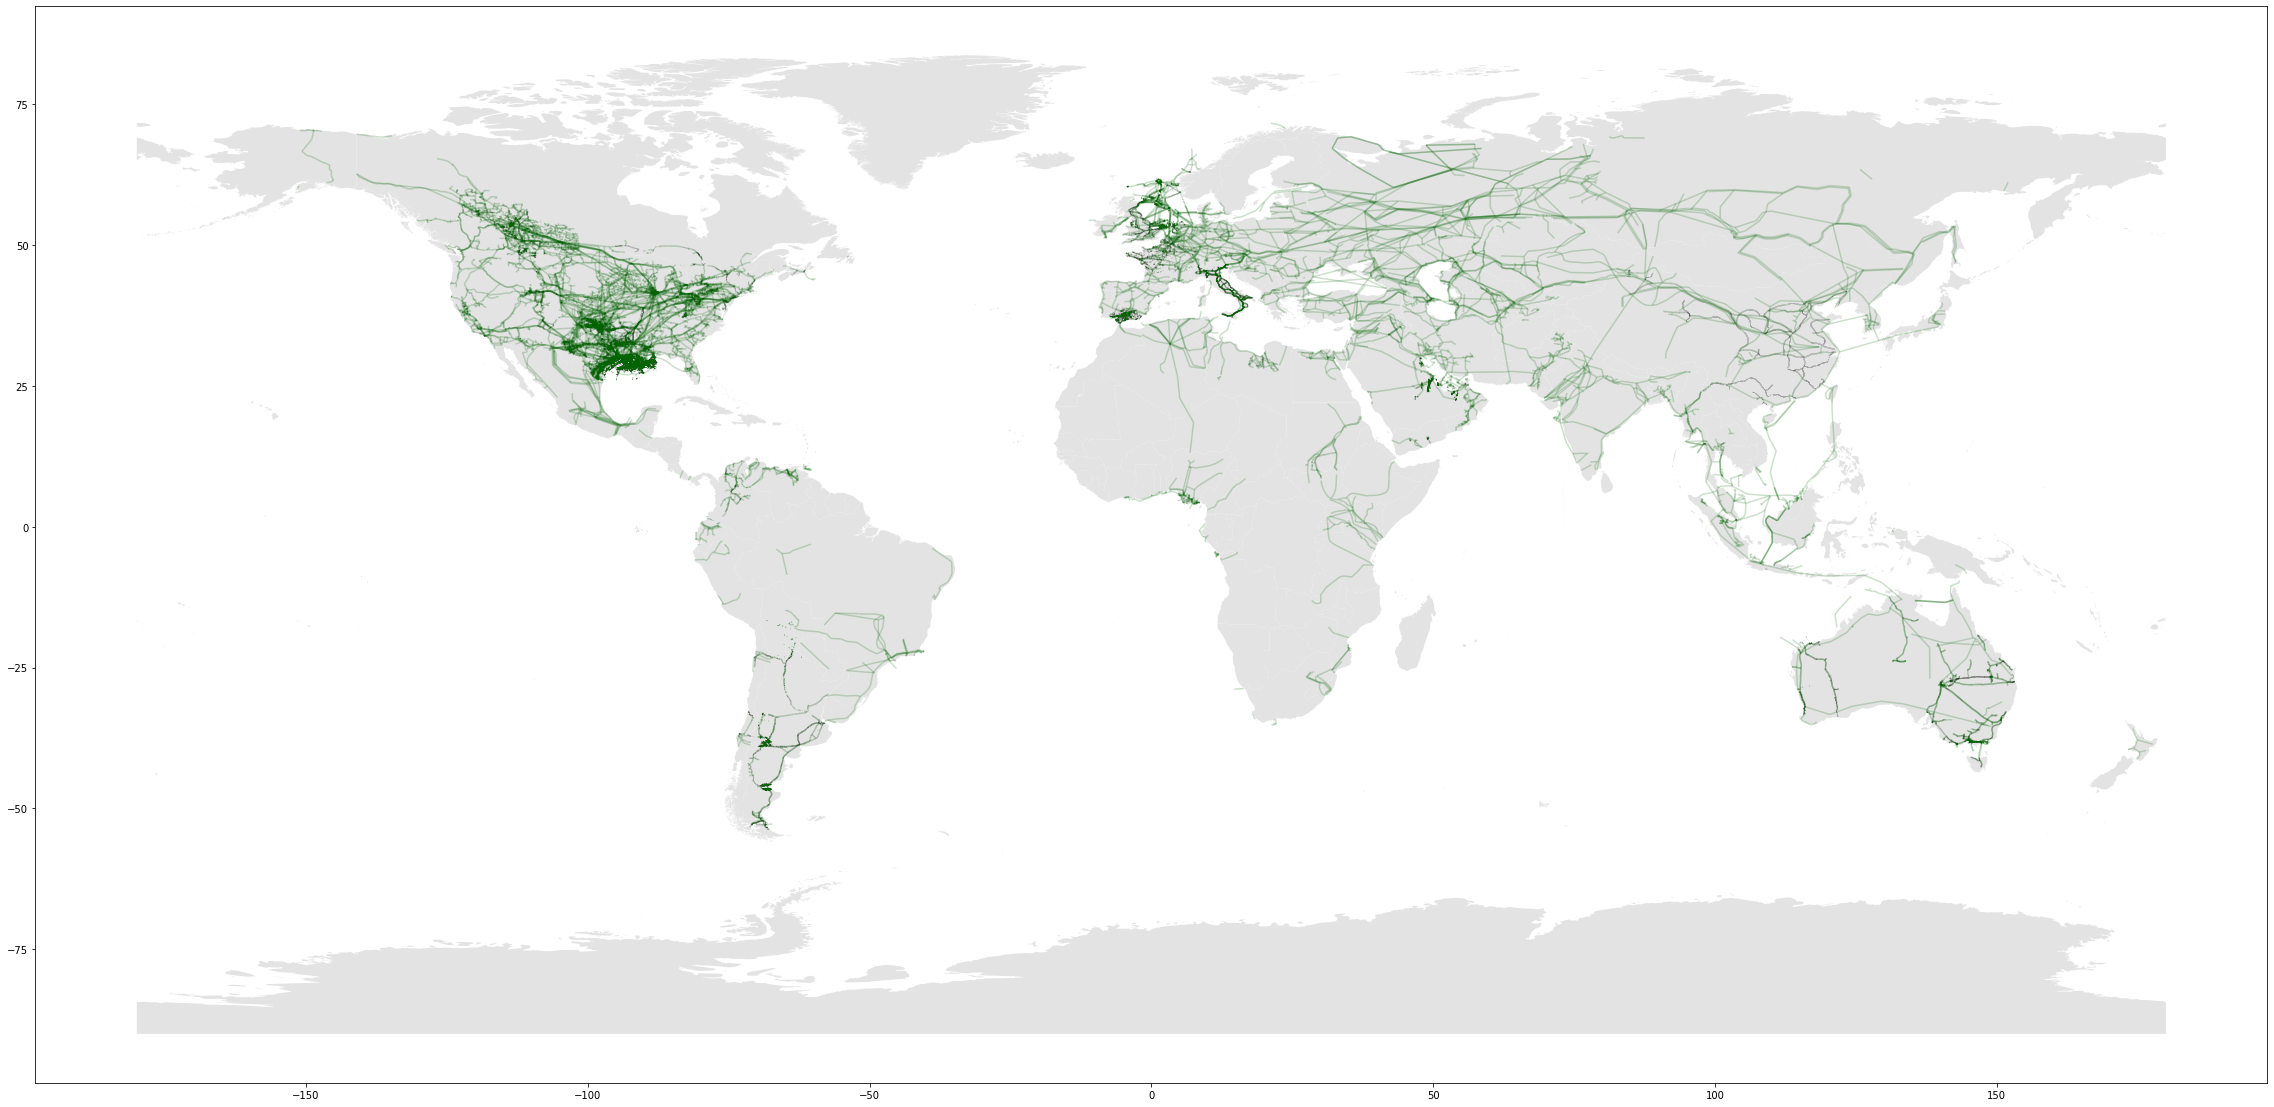

In [27]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
p_e_pre.plot(ax=ax, color=colors['pipelines'], alpha=0.2)

### Visualise pipelines-post

In [65]:
pipelines_e_post = pd.read_csv(os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'))

In [68]:
pipelines_e_post = pipelines_e_post.merge(pipelines_n_pre[['coordinates','PipeNodeID:ID(PipelineNode)']], how='left',left_on='StartNodeId:START_ID(PipelineNode)', right_on='PipeNodeID:ID(PipelineNode)')

In [69]:
pipelines_e_post = pipelines_e_post.merge(pipelines_n_pre[['coordinates','PipeNodeID:ID(PipelineNode)']], how='left',left_on='EndNodeId:END_ID(PipelineNode)', right_on='PipeNodeID:ID(PipelineNode)')

In [71]:
pipelines_e_post = pipelines_e_post.rename(columns={'coordinates_x':'start_coordinates','coordinates_y':'end_coordinates'})

In [72]:
pipelines_e_post['start_coordinates'] = pipelines_e_post['start_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)
pipelines_e_post['end_coordinates'] = pipelines_e_post['end_coordinates'].str.replace('(','[').str.replace(')',']').apply(json.loads)


In [73]:
pipelines_e_post['geometry'] = pipelines_e_post[['start_coordinates', 'end_coordinates']].values.tolist()

In [74]:
pipelines_e_post['geometry'] = pipelines_e_post['geometry'].apply(geometry.LineString)

In [75]:
p_e_post = gpd.GeoDataFrame(pipelines_e_post, geometry=pipelines_e_post['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


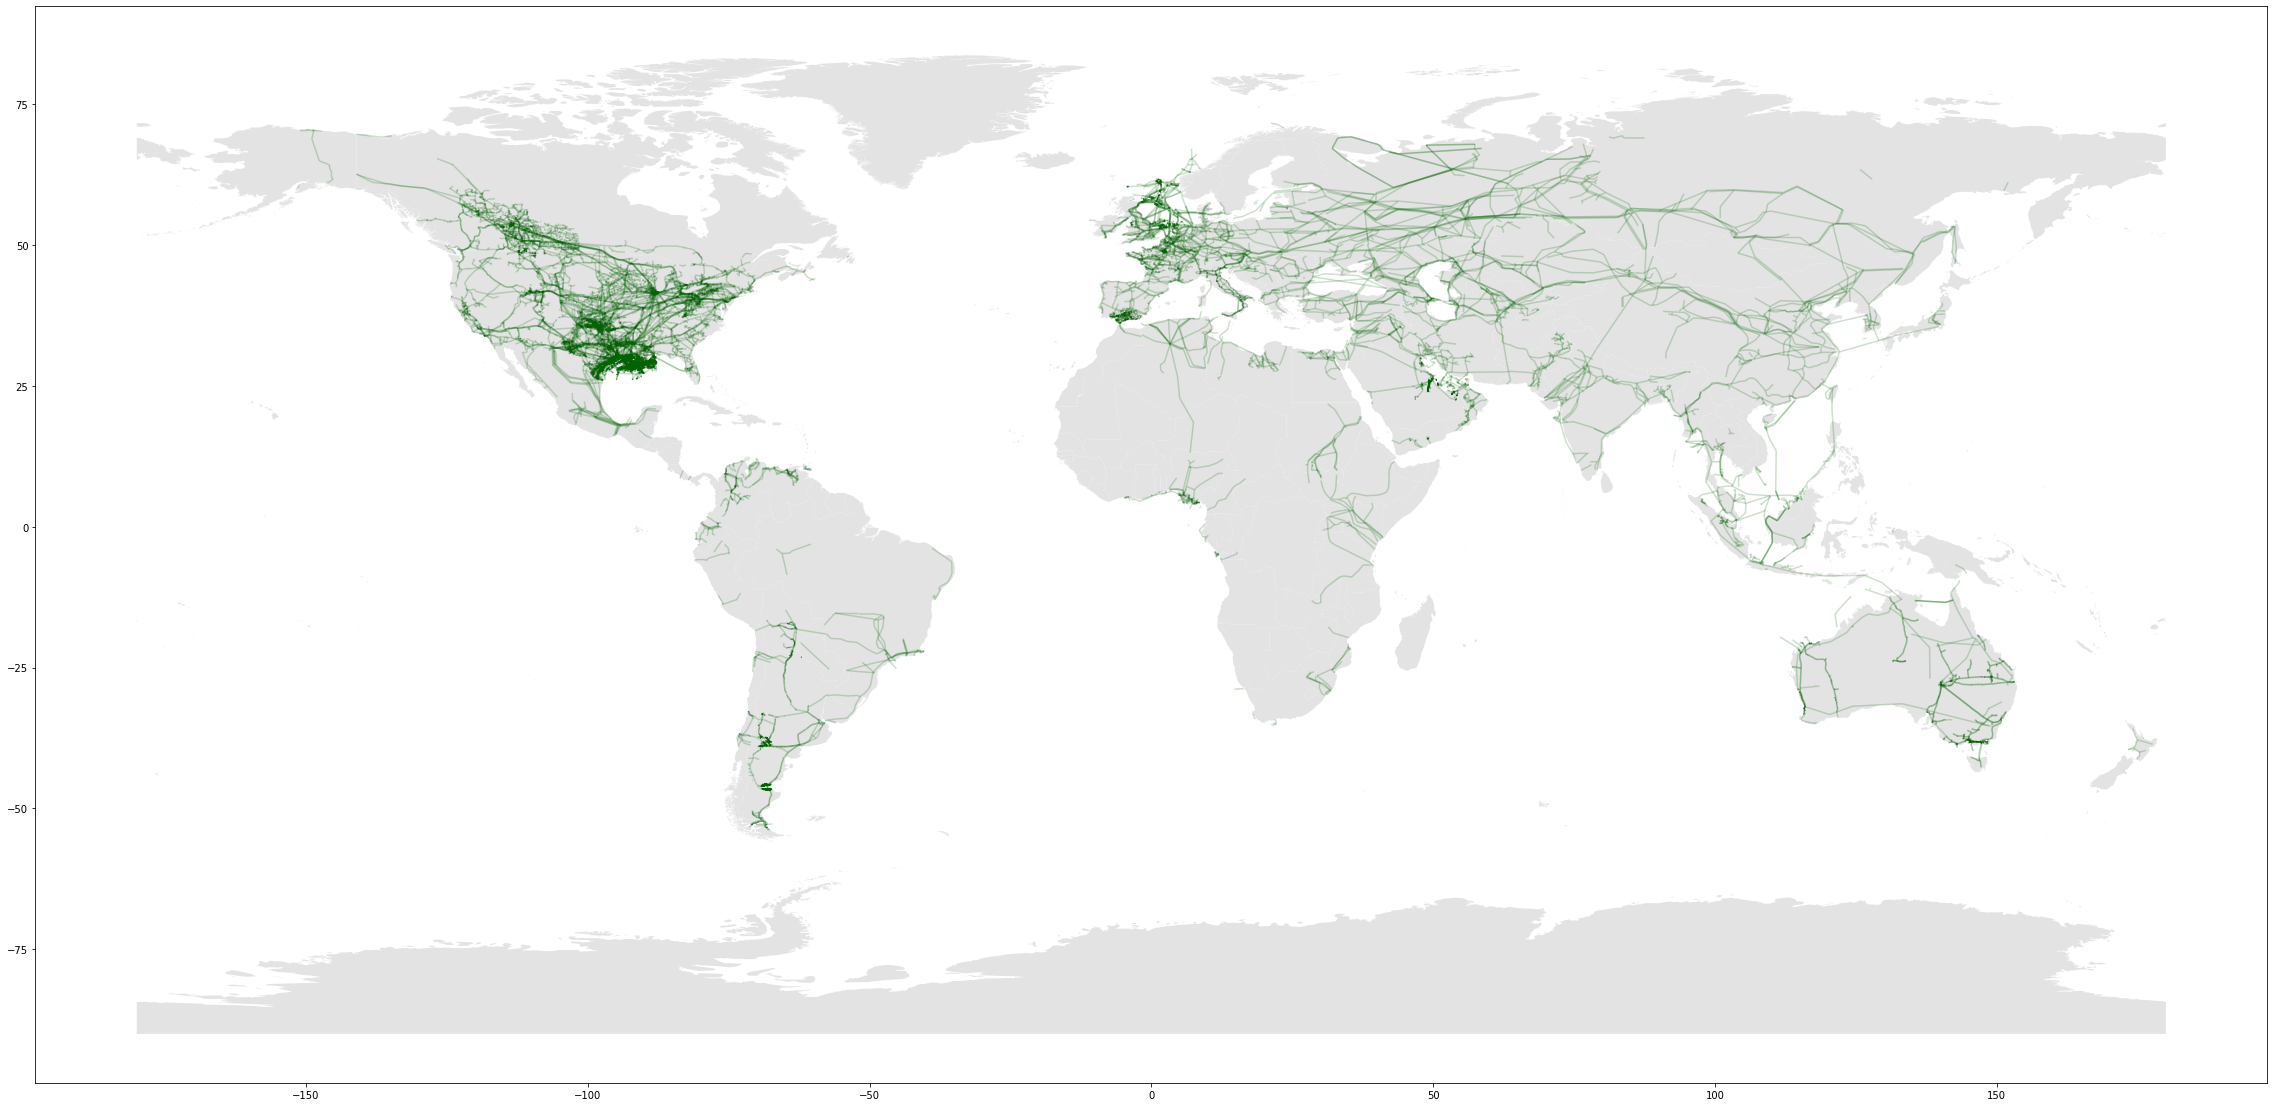

In [76]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
p_e_post.plot(ax=ax, color=colors['pipelines'], alpha=0.2)

### this looks good...

### Check pipelines-cities

In [4]:
p_c_post = pd.read_csv(all_data_dirs['pipelines-cities'])

In [5]:
p_c_post

,Unnamed: 0,PipelineNode:START_ID(PipelineNode),CityNode:END_ID(CityNode),:TYPE,impedance
0,296193,pipe_node_-45.019232999518856-22.593242000095504,city_node_1000,CITY_PIPELINE_CONNECTOR,0
1,336438,pipe_node_7.66654900052492711.69371000013162,city_node_10011,CITY_PIPELINE_CONNECTOR,0
2,336439,pipe_node_7.66654900052492711.69371000013162,city_node_10015,CITY_PIPELINE_CONNECTOR,0
3,336421,pipe_node_6.92000699990228811.234299999706195,city_node_10017,CITY_PIPELINE_CONNECTOR,0
4,296162,pipe_node_-47.1775249996365-22.749947999697547,city_node_1003,CITY_PIPELINE_CONNECTOR,0
...,...,...,...,...,...
5419,296164,pipe_node_-42.01044899964115-22.582305000387624,city_node_998,CITY_PIPELINE_CONNECTOR,0
5420,336420,pipe_node_6.51802299981492811.846847000227452,city_node_9981,CITY_PIPELINE_CONNECTOR,0
5421,336424,pipe_node_12.75835199952871911.999984000352791,city_node_9991,CITY_PIPELINE_CONNECTOR,0
5422,336437,pipe_node_7.66654900052492711.69371000013162,city_node_9994,CITY_PIPELINE_CONNECTOR,0


In [8]:
c_post = pd.read_csv(all_data_dirs['cities-N'])
p_post = pd.read_csv(all_data_dirs['pipelines-N'])

In [12]:
p_post['coordinates'] = p_post['coordinates'].str.replace('(','[').str.replace(')',']')

In [13]:
p_c_post

,Unnamed: 0,PipelineNode:START_ID(PipelineNode),CityNode:END_ID(CityNode),:TYPE,impedance
0,296193,pipe_node_-45.019232999518856-22.593242000095504,city_node_1000,CITY_PIPELINE_CONNECTOR,0
1,336438,pipe_node_7.66654900052492711.69371000013162,city_node_10011,CITY_PIPELINE_CONNECTOR,0
2,336439,pipe_node_7.66654900052492711.69371000013162,city_node_10015,CITY_PIPELINE_CONNECTOR,0
3,336421,pipe_node_6.92000699990228811.234299999706195,city_node_10017,CITY_PIPELINE_CONNECTOR,0
4,296162,pipe_node_-47.1775249996365-22.749947999697547,city_node_1003,CITY_PIPELINE_CONNECTOR,0
...,...,...,...,...,...
5419,296164,pipe_node_-42.01044899964115-22.582305000387624,city_node_998,CITY_PIPELINE_CONNECTOR,0
5420,336420,pipe_node_6.51802299981492811.846847000227452,city_node_9981,CITY_PIPELINE_CONNECTOR,0
5421,336424,pipe_node_12.75835199952871911.999984000352791,city_node_9991,CITY_PIPELINE_CONNECTOR,0
5422,336437,pipe_node_7.66654900052492711.69371000013162,city_node_9994,CITY_PIPELINE_CONNECTOR,0


In [14]:
p_c_post = p_c_post.merge(p_post[['PipeNodeID:ID(PipelineNode)','coordinates']], how='left', left_on='PipelineNode:START_ID(PipelineNode)', right_on='PipeNodeID:ID(PipelineNode)')
p_c_post = p_c_post.merge(c_post[['CityNodeId:ID(CityNode)','coordinates']], how='left', left_on='CityNode:END_ID(CityNode)', right_on='CityNodeId:ID(CityNode)')

In [16]:
p_c_post = p_c_post.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'})

In [17]:
for cc in ['start_coordinates', 'end_coordinates']:
    p_c_post[cc]=p_c_post[cc].apply(json.loads)

In [18]:
p_c_post['geometry'] = p_c_post[['start_coordinates', 'end_coordinates']].values.tolist()

In [19]:
p_c_post['geometry'] = p_c_post['geometry'].apply(geometry.LineString)

In [20]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [21]:
p_c_postgdf = gpd.GeoDataFrame(p_c_post, geometry=p_c_post['geometry'], crs={'init':'epsg:4326'})

/home/ubuntu/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


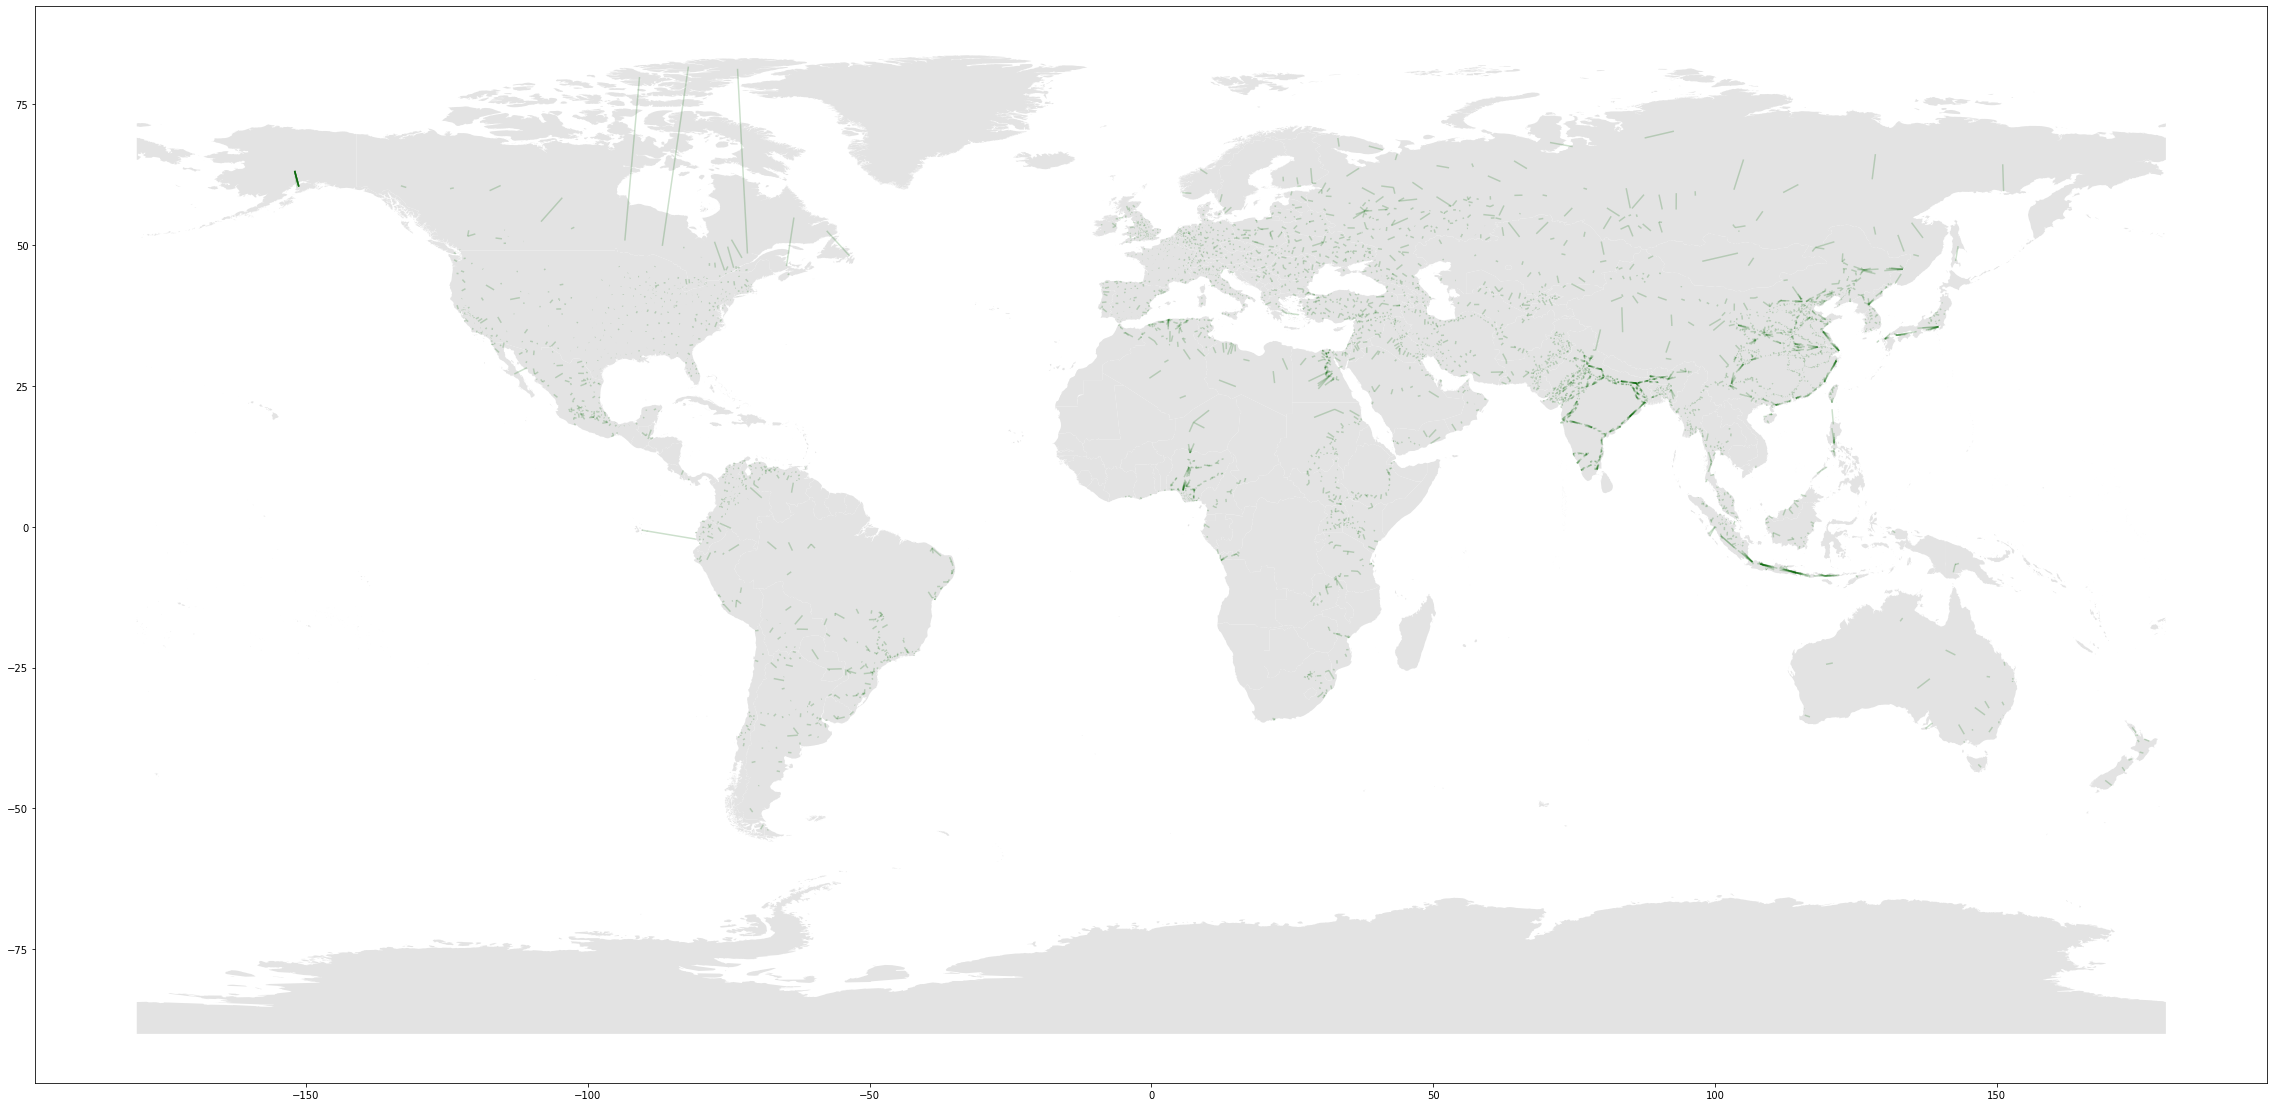

In [22]:
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
p_c_postgdf.plot(ax=ax, color=colors['pipelines'], alpha=0.2)

### Good!